# Nearest Neighbor item based Collaborative Filtering

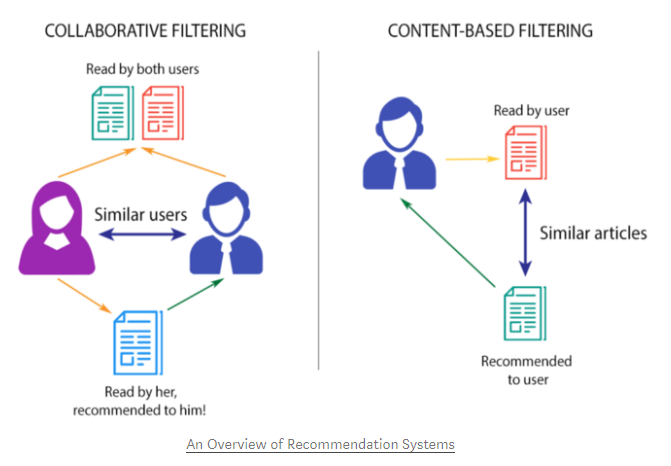

In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## Reading specific columns from dataset
movies_df = pd.read_csv('movies.csv',usecols=['movieId','title'])
rating_df=pd.read_csv('ratings.csv',usecols=['userId', 'movieId', 'rating'])
   

In [3]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [4]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


We can see both the columns have movieID feature, so we can merge on the basis of userid

In [5]:
dataframe=pd.merge(movies_df,rating_df,on='movieId')

In [6]:
dataframe.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [7]:
## The shape of new dataframe
dataframe.shape

(100836, 4)

In [8]:
## The info of dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   title    100836 non-null  object 
 2   userId   100836 non-null  int64  
 3   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.8+ MB


In [9]:
## Checking the rating's statistical values
dataframe['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The distribution of Ratings')

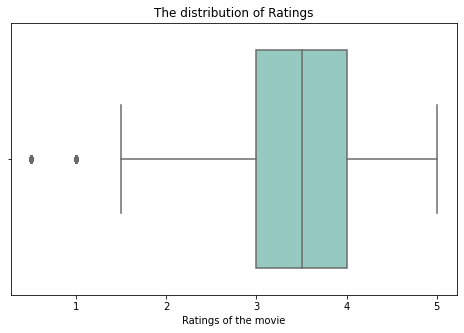

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(dataframe['rating'],palette="Set3")
plt.xlabel('Ratings of the movie')
plt.title('The distribution of Ratings')

Text(0, 0.5, 'Number of Customer(in lakhs)')

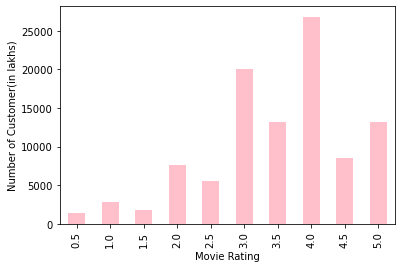

In [11]:
## The count of ratings by the user
dataframe['rating'].value_counts().sort_index().plot(kind='bar',color='pink',)
plt.xlabel('Movie Rating')
plt.ylabel('Number of Customer(in lakhs)')

In [12]:
## Checking nan Values
dataframe.isnull().sum()

movieId    0
title      0
userId     0
rating     0
dtype: int64

In [13]:
## Creating a dataframe by grouping rating inorder to know the count of number of people who have rated
movie_rating_count = (dataframe.groupby(by = ['title'])['rating'].count().reset_index().rename(columns = {'rating': 'totalRatingCount'})[['title', 'totalRatingCount']])
movie_rating_count.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [14]:
## statistical details for the total rating count
print(movie_rating_count['totalRatingCount'].describe())

count    9719.000000
mean       10.375141
std        22.406220
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: totalRatingCount, dtype: float64


In [15]:
## Merging the rating count and data frame
rating_with_total_rating_count = dataframe.merge(movie_rating_count, left_on = 'title', right_on = 'title', how = 'left')
rating_with_total_rating_count.head()

,movieId,title,userId,rating,totalRatingCount
0,1,Toy Story (1995),1,4.0,215
1,1,Toy Story (1995),5,4.0,215
2,1,Toy Story (1995),7,4.5,215
3,1,Toy Story (1995),15,2.5,215
4,1,Toy Story (1995),17,4.5,215


In [20]:
## Assigning a threshold to compare values on the basis of total rating count
popularity_threshold = 50
rating_popular_movie= rating_with_total_rating_count.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,movieId,title,userId,rating,totalRatingCount
0,1,Toy Story (1995),1,4.0,215
1,1,Toy Story (1995),5,4.0,215
2,1,Toy Story (1995),7,4.5,215
3,1,Toy Story (1995),15,2.5,215
4,1,Toy Story (1995),17,4.5,215


In [21]:
print('The shape of Data Frame was:{}'.format(dataframe.shape))
print('The reduced shape of the Data Frame is:{}'.format(rating_popular_movie.shape))

The shape of Data Frame was:(100836, 4)
The reduced shape of the Data Frame is:(41362, 5)


In [22]:
## First lets create a Pivot table with userID as features
movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0


In [23]:
## Converting the above matrix in array matrix
from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(movie_features_df.values)

In [24]:
## Building model using nearest neighbour and cosine similarity
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [25]:
movie_features_df.shape

(450, 606)

In [31]:
## Checking the model
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)

324


In [32]:
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 10)

In [33]:
## Flatening the array and giving the result
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Rear Window (1954):

1: Psycho (1960), with distance of 0.38229665768641286:
2: North by Northwest (1959), with distance of 0.38870295279346134:
3: Vertigo (1958), with distance of 0.4147218521313296:
4: Chinatown (1974), with distance of 0.42118137543841305:
5: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), with distance of 0.4395267433111216:
6: Taxi Driver (1976), with distance of 0.4521657106117428:
7: Casablanca (1942), with distance of 0.4529126364175655:
8: L.A. Confidential (1997), with distance of 0.4798389315835604:
9: Graduate, The (1967), with distance of 0.4963670348341209:


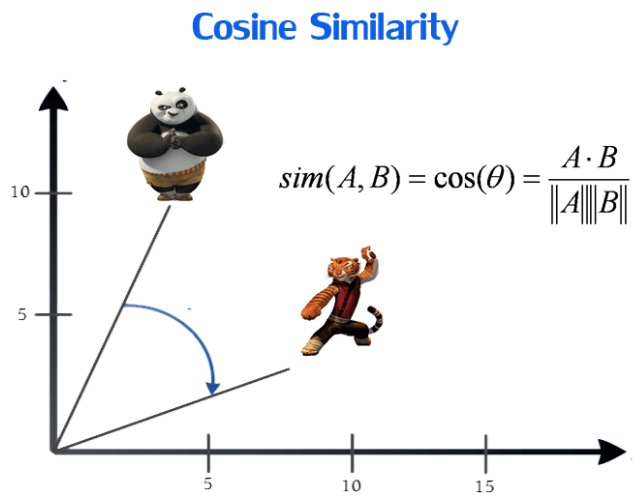